# ДЗ 1

## Подключение библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Встроное отображение графиков
%matplotlib inline

## Расчет варианта

In [2]:
surname = "Панфилкин"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  3
Задача № 1, шаг 11 - вариант:  1
задача № 2 - вариант:  1


## Задание 1. Анализ индикаторов качества государственного управления (The Worldwide Government Indicators, WGI) (6 баллов)

### 1. Загрузка данных в датафрейм

In [3]:
# Список годов, которые присутствуют в документе (некоторые пропущены, поэтому вручную определяю)
years = [1996, 1998, 2000] + list(range(2002, 2022))
# Список имен колонок для датафрейма (Беру страну и ее код + все колонки Estimate и Rank)
col_names = ["Country/Territory", "Code"] + [f"{name} {year}" for year in years for name in ["Estimate", "Rank"]]
# Список номеров колонок excel-файла, которые нужно считать (первые две колонки и каждую третью после до 140 (посчитал сам))
col_nums = [0, 1] + [i for i in range(2, 140, 3)]

# pd.read_excel - чтение данных из файла Excel
# sheet_name - имя листа, с которого нужно считать данные
# skiprows - количество строк сверху, которые нужно пропустить
# usecols - колонки, которые нужно считать
# names - имена колонок
wgidataset = pd.read_excel('data/wgidataset.xlsx', sheet_name='ControlofCorruption', skiprows=14, names=col_names, usecols=col_nums)
wgidataset

,Country/Territory,Code,Estimate 1996,Rank 1996,Estimate 1998,Rank 1998,Estimate 2000,Rank 2000,Estimate 2002,Rank 2002,...,Estimate 2017,Rank 2017,Estimate 2018,Rank 2018,Estimate 2019,Rank 2019,Estimate 2020,Rank 2020,Estimate 2021,Rank 2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.287308,87.980766,1.247948,87.500000,1.213882,85.576920,1.232362,86.057693,0.834079,79.326920
1,Andorra,ADO,1.318143,87.096771,1.334759,89.304810,1.313404,88.297874,1.310744,87.830688,...,1.237865,86.538460,1.234533,86.538460,1.231043,88.461540,1.311401,88.461540,1.325617,88.942307
2,Afghanistan,AFG,-1.291705,4.301075,-1.176012,8.021390,-1.271724,4.787234,-1.251137,4.761905,...,-1.521726,3.846154,-1.489772,4.807693,-1.407710,6.250000,-1.480538,4.807693,-1.142377,12.500000
3,Angola,AGO,-1.167702,9.677420,-1.180451,7.486631,-1.197514,8.510638,-1.155493,7.936508,...,-1.428053,5.769231,-1.180501,11.057693,-1.078114,12.980769,-0.953371,18.269230,-0.655346,27.884615
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.237865,86.538460,1.234533,86.538460,1.231043,88.461540,0.675268,74.519234,0.680943,74.519234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Serbia,SRB,-1.140072,11.827957,-1.195605,6.417112,-1.156671,9.042553,-0.895785,23.280424,...,-0.412285,43.269230,-0.373657,41.826923,-0.428668,38.942307,-0.429459,38.461540,-0.437255,36.057693
210,South Africa,ZAF,0.732927,76.344086,0.638809,72.727272,0.550270,70.212769,0.332902,67.195770,...,-0.101496,53.846153,-0.112126,53.365383,0.020065,57.211540,-0.010780,56.250000,0.022103,55.769230
211,"Congo, Dem. Rep.",ZAR,-1.647852,0.000000,-1.416679,1.069519,-1.459175,0.531915,-1.449971,1.058201,...,-1.428617,5.288462,-1.500561,3.846154,-1.539866,3.365385,-1.574677,2.403846,-1.552154,4.326923
212,Zambia,ZMB,-0.840641,24.731182,-0.853156,26.737968,-0.818261,26.595745,-0.758519,29.629629,...,-0.545036,35.096153,-0.657134,28.365385,-0.662320,27.884615,-0.723668,26.442308,-0.753424,25.480770


### 2. Cортировка данных по убыванию индекса dataframe

In [4]:
# Сортирую по индексу в порядке убывания
wgidataset.sort_index(ascending=False, inplace=True)
wgidataset

,Country/Territory,Code,Estimate 1996,Rank 1996,Estimate 1998,Rank 1998,Estimate 2000,Rank 2000,Estimate 2002,Rank 2002,...,Estimate 2017,Rank 2017,Estimate 2018,Rank 2018,Estimate 2019,Rank 2019,Estimate 2020,Rank 2020,Estimate 2021,Rank 2021
213,Zimbabwe,ZWE,-0.278847,47.849461,-0.504802,37.433155,-1.127275,10.638298,-1.156760,7.407407,...,-1.281081,9.615385,-1.227581,10.096154,-1.273280,10.096154,-1.289440,9.615385,-1.257897,8.653846
212,Zambia,ZMB,-0.840641,24.731182,-0.853156,26.737968,-0.818261,26.595745,-0.758519,29.629629,...,-0.545036,35.096153,-0.657134,28.365385,-0.662320,27.884615,-0.723668,26.442308,-0.753424,25.480770
211,"Congo, Dem. Rep.",ZAR,-1.647852,0.000000,-1.416679,1.069519,-1.459175,0.531915,-1.449971,1.058201,...,-1.428617,5.288462,-1.500561,3.846154,-1.539866,3.365385,-1.574677,2.403846,-1.552154,4.326923
210,South Africa,ZAF,0.732927,76.344086,0.638809,72.727272,0.550270,70.212769,0.332902,67.195770,...,-0.101496,53.846153,-0.112126,53.365383,0.020065,57.211540,-0.010780,56.250000,0.022103,55.769230
209,Serbia,SRB,-1.140072,11.827957,-1.195605,6.417112,-1.156671,9.042553,-0.895785,23.280424,...,-0.412285,43.269230,-0.373657,41.826923,-0.428668,38.942307,-0.429459,38.461540,-0.437255,36.057693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.237865,86.538460,1.234533,86.538460,1.231043,88.461540,0.675268,74.519234,0.680943,74.519234
3,Angola,AGO,-1.167702,9.677420,-1.180451,7.486631,-1.197514,8.510638,-1.155493,7.936508,...,-1.428053,5.769231,-1.180501,11.057693,-1.078114,12.980769,-0.953371,18.269230,-0.655346,27.884615
2,Afghanistan,AFG,-1.291705,4.301075,-1.176012,8.021390,-1.271724,4.787234,-1.251137,4.761905,...,-1.521726,3.846154,-1.489772,4.807693,-1.407710,6.250000,-1.480538,4.807693,-1.142377,12.500000
1,Andorra,ADO,1.318143,87.096771,1.334759,89.304810,1.313404,88.297874,1.310744,87.830688,...,1.237865,86.538460,1.234533,86.538460,1.231043,88.461540,1.311401,88.461540,1.325617,88.942307


### 3. Отображение данных по индексу WGI за 2021 год в виде горизонтального столбчатого графика (rank)

#### Подготовка датафрейма

In [5]:
# wgidataset_ranks - датафрейм, в котором будут только колонки относящиеся к рангам
wgidataset_ranks = wgidataset.copy()
# Удаляем колонки с Estimate
wgidataset_ranks.drop(columns=[col for col in wgidataset_ranks.columns if 'Estimate' in col], inplace=True)
# Переименовываем колонки с Rank в год
wgidataset_ranks.rename(columns={col: col.split(' ')[1] for col in wgidataset_ranks.columns if 'Rank' in col}, inplace=True)
# Создаем массив без NaN, отсортированный по возрастанию и имеющий только уникальные значения
# Это нужно для того, чтобы определить позицию страны в рейтинге
unique_ranks_2021 = wgidataset_ranks['2021'].dropna().sort_values(ascending=False).unique()

# Функция, которая возвращает позицию страны в рейтинге
# val - значение ранга страны
# unique_sorted_vals - массив уникальных значений рангов, отсортированных по возрастанию
# nearest - если True, то возвращает позицию ближайшего ранга, если False, то позицию точного ранга
def get_position_by_val(val, unique_sorted_vals, nearest=False):
    if np.isnan(val):
        return np.nan
    if not nearest:
        return np.where(unique_sorted_vals == val)[0][0] + 1
    nearest_rank = unique_sorted_vals[np.argmin(np.abs(unique_sorted_vals - val))]
    return np.where(unique_sorted_vals == nearest_rank)[0][0] + 1

# Создаем колонку с позицией страны в рейтинге (Данная колонка имеет тип float, так как в ней может быть NaN)
wgidataset_ranks['Position 2021'] = wgidataset_ranks['2021'].apply(lambda x: get_position_by_val(x, unique_ranks_2021))

# Создаем датафрейм для графика: страна, ранг в 2021, позиция в рейтинге в 2021 + сортируем по рангу и удаляем строки с NaN
bar_h_df = wgidataset_ranks[['Country/Territory', '2021', 'Position 2021']].sort_values(by='2021', ascending=True).dropna(axis=0)
# Добавляем в этот датафрейм колонку с позицией в рейтинге и страной.
# Сначала приводим к типу int, а потом к типу str, так как в колонке с позицией в рейтинге тип float, даже если в ней нет NaN
bar_h_df['Label'] = bar_h_df['Position 2021'].astype(int).astype(str) + '. ' + bar_h_df['Country/Territory']

#### Отрисовка графика

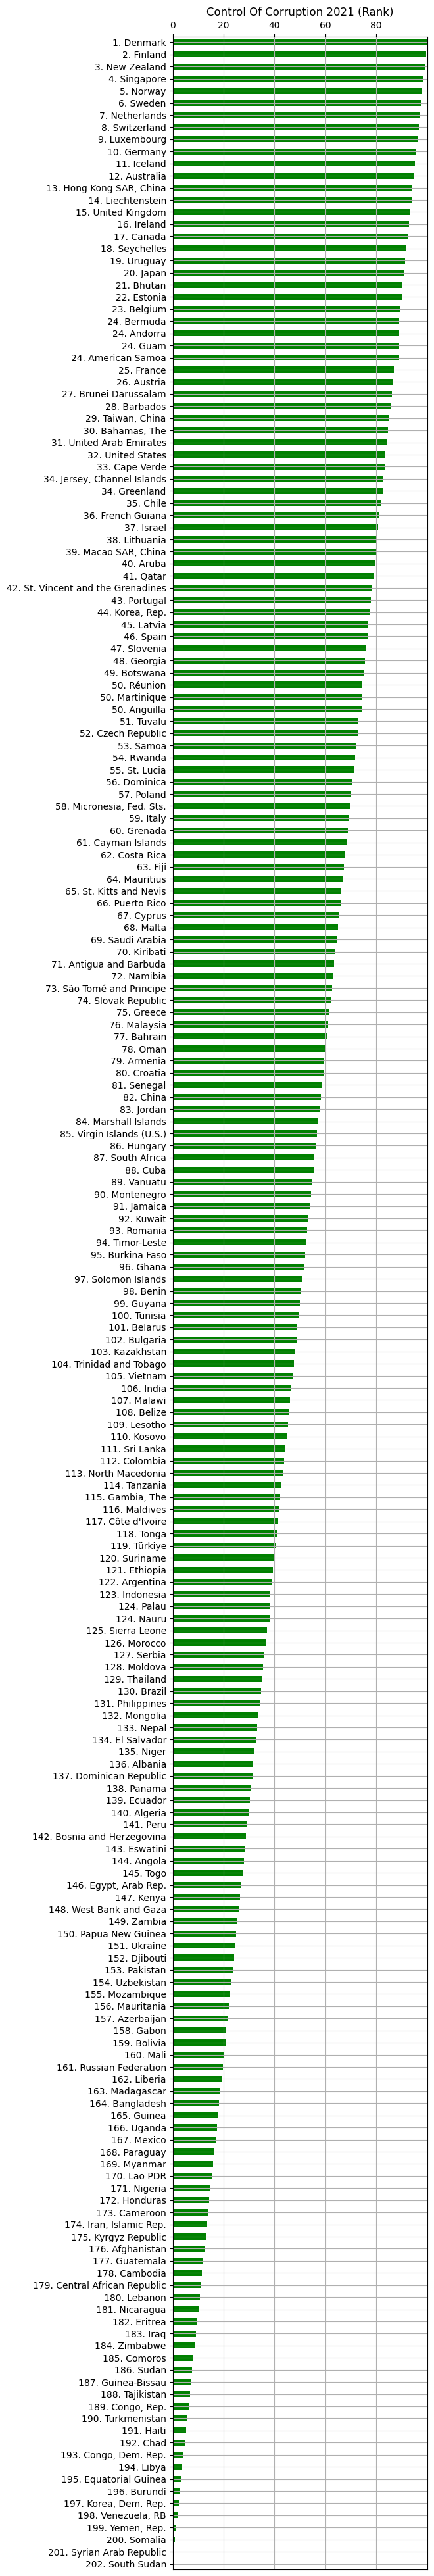

In [6]:
# Создание фигуры и осей для графика (fig - фигура, ax - оси)
fig, ax = plt.subplots(figsize=(5, 50))

# barh - создание горизонтальной гистограммы
#   wgidataset['Label'] - массив значений для оси x (в данном случае названия столбцов гистограммы с позицией)
#   wgidataset['2021'] - массив значений для оси y (в данном случае длины столбцов гистограммы)
#   color - цвет гистограммы
#   height - высота столбцов гистограммы
ax.barh(
    bar_h_df['Label'],
    bar_h_df['2021'],
    color='green',
    height=0.5
)
# Установка названия графика
ax.set_title('Control Of Corruption 2021 (Rank)')
# Отображение сетки
ax.grid(visible=True)
# Установка отступов для осей
ax.margins(0.001)
# Установка значений для оси x (в данном случае от 0 до 80 с шагом 20)
ax.set_xticks(np.arange(0, 81, 20))
# Отображение оси x сверху
ax.xaxis.tick_top()



### 4. Формирование DataFrame из исходного для региона в соответствии с моим вариантом (Вариант 3 - Europe and Central Asia - ECA)


In [7]:
# Загрузка данных о странах, их кодах и регионах в датафрейм из файла Excel (regions.xlsx)
regions_df = pd.read_excel('data/regions.xlsx')
region = 'ECA'

# Add Region column to wgidataset by Code if Code is in regions_df else np.nan
wgidataset['Region'] = wgidataset['Code'].apply(lambda x: regions_df[regions_df['Code'] == x]['Region'].values[0] if x in regions_df['Code'].values else np.nan)
wgidataset_ECA_region = wgidataset[wgidataset['Region'] == region]

### 5. Вывод данных DataFrame


In [8]:
# Вывод данных датафрейма wgidataset_ECA_region
wgidataset_ECA_region

,Country/Territory,Code,Estimate 1996,Rank 1996,Estimate 1998,Rank 1998,Estimate 2000,Rank 2000,Estimate 2002,Rank 2002,...,Rank 2017,Estimate 2018,Rank 2018,Estimate 2019,Rank 2019,Estimate 2020,Rank 2020,Estimate 2021,Rank 2021,Region
209,Serbia,SRB,-1.140072,11.827957,-1.195605,6.417112,-1.156671,9.042553,-0.895785,23.280424,...,43.269230,-0.373657,41.826923,-0.428668,38.942307,-0.429459,38.461540,-0.437255,36.057693,ECA
200,Uzbekistan,UZB,-1.128821,12.903226,-1.134654,11.229946,-1.080415,12.234042,-0.964739,19.576719,...,12.019231,-1.059244,12.980769,-1.026222,15.384615,-1.050369,15.865385,-0.808077,23.076923,ECA
197,Ukraine,UKR,-1.110137,13.440860,-1.258210,4.278075,-1.110609,11.170213,-1.091394,9.523809,...,21.153847,-0.901347,17.788462,-0.780903,25.000000,-0.811725,23.076923,-0.766657,24.519230,ECA
192,Türkiye,TUR,-0.148074,51.612904,-0.354078,45.454544,-0.258080,46.808510,-0.570129,34.920635,...,49.519230,-0.327102,44.230770,-0.302947,43.750000,-0.338743,43.269230,-0.385957,40.384617,ECA
187,Turkmenistan,TKM,-1.021493,15.591398,-1.068734,15.508021,-1.077138,12.765958,-1.054273,11.111111,...,7.692307,-1.362379,7.692307,-1.376065,7.692307,-1.413870,6.250000,-1.419503,5.769231,ECA
186,Tajikistan,TJK,-1.273033,5.913979,-1.252361,4.812834,-1.265868,5.319149,-1.174971,6.878307,...,8.173077,-1.409969,6.730769,-1.330042,9.134615,-1.327856,7.692307,-1.338215,6.730769,ECA
163,Russian Federation,RUS,-1.053342,15.053763,-0.954374,21.390375,-0.943414,20.212767,-0.954848,20.634920,...,17.307692,-0.848471,20.192308,-0.802163,24.038462,-0.909426,19.230770,-0.900474,19.711538,ECA
131,Montenegro,MNE,NaN,NaN,0.497083,68.983955,-0.177506,51.595745,-0.156704,51.851852,...,55.288460,0.012018,57.692307,-0.004423,55.769230,-0.018825,55.769230,-0.019546,54.326923,ECA
126,North Macedonia,MKD,-0.613846,32.258064,-0.636420,34.224598,-0.638976,33.510639,-0.826058,25.396826,...,45.192307,-0.367773,42.788460,-0.434369,37.980770,-0.471356,34.615383,-0.351957,43.269230,ECA
121,Moldova,MDA,-0.437427,39.784946,-0.399806,42.780750,-0.623196,34.574467,-0.980350,17.989418,...,21.634615,-0.725502,25.961538,-0.623985,30.288462,-0.549642,32.211540,-0.447891,35.576923,ECA


### 6. Построение графиков индекса WGI за 1996-2021 для стран своего региона (Еstimate)

#### Подготовка датафрейма

In [9]:
# wgidataset_ECA_region_estimates - датафрейм по региону ECA, в котором будут только колонки относящиеся к Estimate
wgidataset_ECA_region_estimates = wgidataset_ECA_region.copy()
# Удаляем колонки с Rank
wgidataset_ECA_region_estimates.drop(columns=[col for col in wgidataset_ECA_region_estimates.columns if 'Rank' in col], inplace=True)
# Переименовываем колонки с Estimate в год
wgidataset_ECA_region_estimates.rename(columns={col: col.split(' ')[1] for col in wgidataset_ECA_region_estimates.columns if 'Estimate' in col}, inplace=True)
wgidataset_ECA_region_estimates

,Country/Territory,Code,1996,1998,2000,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Region
209,Serbia,SRB,-1.140072,-1.195605,-1.156671,-0.895785,-0.494189,-0.493294,-0.406051,-0.277591,...,-0.327526,-0.247089,-0.293314,-0.359122,-0.412285,-0.373657,-0.428668,-0.429459,-0.437255,ECA
200,Uzbekistan,UZB,-1.128821,-1.134654,-1.080415,-0.964739,-0.914872,-1.068812,-1.229638,-1.016336,...,-1.273043,-1.194444,-1.270281,-1.181306,-1.167382,-1.059244,-1.026222,-1.050369,-0.808077,ECA
197,Ukraine,UKR,-1.110137,-1.258210,-1.110609,-1.091394,-0.966655,-0.979342,-0.740643,-0.772782,...,-1.176262,-1.024342,-1.018160,-0.847186,-0.810839,-0.901347,-0.780903,-0.811725,-0.766657,ECA
192,Türkiye,TUR,-0.148074,-0.354078,-0.258080,-0.570129,-0.209118,-0.191904,-0.035273,0.026675,...,0.091790,-0.134038,-0.135501,-0.174212,-0.183095,-0.327102,-0.302947,-0.338743,-0.385957,ECA
187,Turkmenistan,TKM,-1.021493,-1.068734,-1.077138,-1.054273,-1.015132,-1.270521,-1.347762,-1.399204,...,-1.285362,-1.177111,-1.204197,-1.376829,-1.348997,-1.362379,-1.376065,-1.413870,-1.419503,ECA
186,Tajikistan,TJK,-1.273033,-1.252361,-1.265868,-1.174971,-1.147746,-1.319210,-1.176047,-1.042832,...,-1.287331,-1.132050,-1.123586,-1.148092,-1.328738,-1.409969,-1.330042,-1.327856,-1.338215,ECA
163,Russian Federation,RUS,-1.053342,-0.954374,-0.943414,-0.954848,-0.783092,-0.825626,-0.847121,-0.940848,...,-1.020387,-0.918525,-0.952243,-0.817593,-0.893895,-0.848471,-0.802163,-0.909426,-0.900474,ECA
131,Montenegro,MNE,NaN,0.497083,-0.177506,-0.156704,-0.411994,-0.467465,-0.354254,-0.383751,...,-0.286886,-0.075149,-0.094629,-0.053474,-0.055764,0.012018,-0.004423,-0.018825,-0.019546,ECA
126,North Macedonia,MKD,-0.613846,-0.636420,-0.638976,-0.826058,-0.651164,-0.554222,-0.488401,-0.403455,...,-0.056260,-0.032469,-0.238547,-0.272066,-0.301944,-0.367773,-0.434369,-0.471356,-0.351957,ECA
121,Moldova,MDA,-0.437427,-0.399806,-0.623196,-0.980350,-0.884173,-1.039576,-0.672626,-0.643212,...,-0.752407,-0.852724,-0.915586,-0.956894,-0.803161,-0.725502,-0.623985,-0.549642,-0.447891,ECA


#### Отрисовка графика

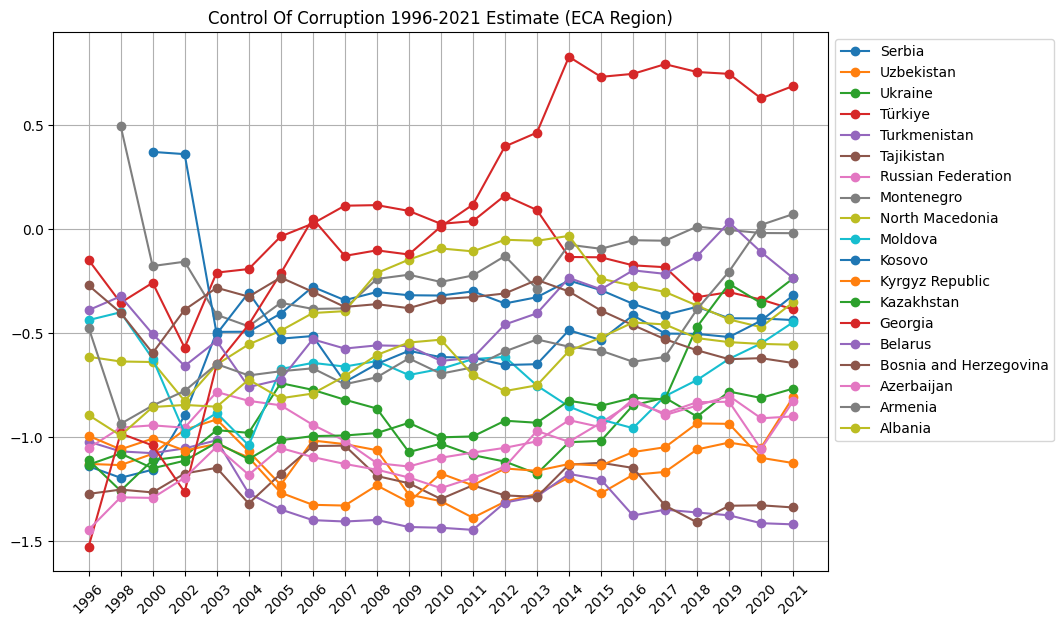

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))

# [2:-1] - срез колонок без Country/Territory, Code и Region
slice_values = slice(2, -1)
# Итерация по строкам датафрейма wgidataset_ECA_region_estimates и построение графика
for index, row in wgidataset_ECA_region_estimates.iterrows():
    ax.plot(row[slice_values], marker='o', linestyle='-', label=row['Country/Territory'])

ax.set_title('Control Of Corruption 1996-2021 Estimate (ECA Region)')
ax.grid(visible=True)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', labelrotation=45)

### 7. Нахождение стран с наибольшим и наименьшим значением WGI моего варианта региона (ECA) за 2021 год (estimate)
_⚠️Замечание. У нескольких стран может быть одна и та же позиция в рейтинге из-за одинаковых значений индекса_

In [11]:

# Получение максимального и минимального показателя 'Estimate 2021'
max_estimate_2021 = wgidataset_ECA_region['Estimate 2021'].max()
min_estimate_2021 = wgidataset_ECA_region['Estimate 2021'].min()

# Получение стран с максимальным и минимальным показателем 'Estimate 2021'
countries_with_max_estimate_2021 = wgidataset_ECA_region[wgidataset_ECA_region['Estimate 2021'] == max_estimate_2021]['Country/Territory'].values
countries_with_min_estimate_2021 = wgidataset_ECA_region[wgidataset_ECA_region['Estimate 2021'] == min_estimate_2021]['Country/Territory'].values

# Вывод стран с максимальным и минимальным показателем 'Estimate 2021'
print(f"Страны с максимальным показателем 'Estimate 2021' региона ECA: {', '.join(countries_with_max_estimate_2021)}")
print(f"Страны с минимальным показателем 'Estimate 2021' региона ECA: {', '.join(countries_with_min_estimate_2021)}")

Страны с максимальным показателем 'Estimate 2021' региона ECA: Georgia
Страны с минимальным показателем 'Estimate 2021' региона ECA: Turkmenistan


### 8. Определение среднего значения за каждый год в период с 1996 по 2021 (estimate)

In [12]:
# Вычисление среднего значения по странам региона ECA для каждого года
#  numeric_only=True - вычисление среднего значения только для числовых столбцов 
wgidataset_ECA_region_estimates_mean = wgidataset_ECA_region_estimates.mean(numeric_only=True)
wgidataset_ECA_region_estimates_mean

1996   -0.885471
1998   -0.823362
2000   -0.802862
2002   -0.821879
2003   -0.740051
2004   -0.782648
2005   -0.727624
2006   -0.685522
2007   -0.721019
2008   -0.698221
2009   -0.720827
2010   -0.721366
2011   -0.719957
2012   -0.666920
2013   -0.660700
2014   -0.584655
2015   -0.618457
2016   -0.595601
2017   -0.609737
2018   -0.577367
2019   -0.539547
2020   -0.574089
2021   -0.529375
dtype: float64

### 9. Построение графикоа индекса WGI за 1996-2021 для стран моего региона и выделение страны с наибольшим и наименьшим значением WGI за 2021 год, а также отображение среднего значения по региону и РФ

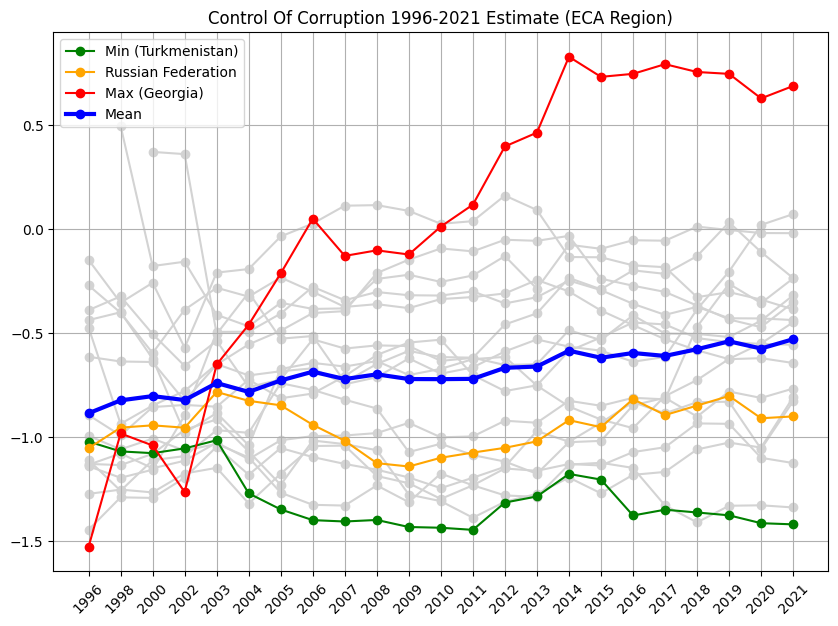

In [13]:
# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(10, 7))

# Итерация по всем строкам датафрейма wgidataset_ECA_region_estimates
for index, row in wgidataset_ECA_region_estimates.iterrows():
    # Если страна в списке стран с максимальным показателем 'Estimate 2021'
    if row['Country/Territory'] in countries_with_max_estimate_2021:
        ax.plot(row[slice_values], marker='o', linestyle='-', label=f"Max ({row['Country/Territory']})", color='red')
    # Если страна в списке стран с минимальным показателем 'Estimate 2021'
    elif row['Country/Territory'] in countries_with_min_estimate_2021:
        ax.plot(row[slice_values], marker='o', linestyle='-', label=f"Min ({row['Country/Territory']})", color='green')
    # Если страна - Россия
    elif row['Country/Territory'] == 'Russian Federation':
        ax.plot(row[slice_values], marker='o', linestyle='-', label=row['Country/Territory'], color='orange')
    # В остальных случаях
    else:
        # Отображение страны с серым цветом
        #  zorder=1 - отображение страны ниже остальных линий
        ax.plot(row[slice_values], marker='o', linestyle='-', color='lightgray', zorder=1)
# Отображение среднего значения по странам региона с толстой линией
ax.plot(wgidataset_ECA_region_estimates_mean, marker='o', linestyle='-', label='Mean', color='blue', linewidth=3)

# Установка заголовка
ax.set_title('Control Of Corruption 1996-2021 Estimate (ECA Region)')
# Отображение сетки
ax.grid(visible=True)
# Отображение легенды
ax.legend(loc='upper left')
# Поворот подписей оси X на 45 градусов
ax.tick_params(axis='x', labelrotation=45)

### 11. Определение, как изменилось значение показателя в соответствии с моим вариантом (Вариант 1 - На сколько позиций в рейтинге c 1996 по 2021) с 1996 по 2021 (rank)
_⚠️Замечание. У нескольких стран может быть одна и та же позиция в рейтинге из-за одинаковых значений индекса_

#### Подготовка датафрейма
_Примечание. Я использую .values[0] потому что для каждой позиции в данном случае находится ровно одна запись со страной_

In [14]:
# По аналогии с unique_ranks_2021 проставляем позиции для 1996 года
unique_ranks_1996 = wgidataset_ranks['1996'].dropna().sort_values(ascending=False).unique()
wgidataset_ranks['Position 1996'] = wgidataset_ranks['1996'].apply(lambda x: get_position_by_val(x, unique_ranks_1996))

# Функция которая возвращает регион по коду страны из датафрейма regions_df
def get_region_by_country_code(country_code):
    return regions_df[regions_df['Code'] == country_code]['Region'].values[0]

# Столбцы для датафрейма wgidataset_dynamic
columns = ['Region', 'Country/Territory', 'Rank 1996', 'Rank 2021', 'Position Change 1996-2021']
# Создание датафрейма wgidataset_dynamic
wgidataset_dynamic = pd.DataFrame(columns=columns)

# Определение позиций в 2021 году для стран с максимальным, минимальным и средним рангом, а также России
positions_estimate_2021_dict = {
    # nearest=True - если не найдено точное совпадение, то возвращается ближайшее значение,
    #  так как не обязательно, что в датафрейме wgidataset_ranks есть точное совпадение с средним значением
    'Mean 2021': get_position_by_val(wgidataset_ranks['2021'].mean(), unique_ranks_2021, nearest=True),
    'Max 2021': get_position_by_val(wgidataset_ranks['2021'].max(), unique_ranks_2021),
    'Min 2021': get_position_by_val(wgidataset_ranks['2021'].min(), unique_ranks_2021),
    'Russia 2021': wgidataset_ranks[wgidataset_ranks['Country/Territory'] == 'Russian Federation']['Position 2021'].values[0],
}

# Итерация по списку позиций и индексов
# zip() - объединение списков в кортежи для удобства итерации
for index, position in positions_estimate_2021_dict.items():
    # Получение строки по позиции
    row = wgidataset_ranks[wgidataset_ranks['Position 2021'] == position]
    # Вычисление изменения позиции
    position_change = row['Position 2021'].values[0] - row['Position 1996'].values[0]
    # Если изменение позиции NaN, то заменяем его на '-'
    if np.isnan(position_change):
        position_change = '-'
    else:
        # Приведение типа к int так как там лежит float
        position_change = int(position_change)
        # Если изменение позиции больше 0, то добавляем в начало '↓', иначе '↑'
        # (чем выше позиция - тем хуже)
        if position_change > 0:
            position_change = f'↓ {position_change}'
        elif position_change < 0:
            position_change = f'↑ {position_change}'

    # Добавление строки в датафрейм wgidataset_dynamic с индексом index
    wgidataset_dynamic.loc[index] = [
        # Получение региона по коду страны
        get_region_by_country_code(row['Code'].values[0]),
        row['Country/Territory'].values[0],
        row['1996'].values[0],
        row['2021'].values[0],
        position_change,
    ]


### 12. Вывод таблицы для моего варианта (WGI - rank)

In [15]:
wgidataset_dynamic

,Region,Country/Territory,Rank 1996,Rank 2021,Position Change 1996-2021
Mean 2021,AME,Guyana,52.688171,50.000000,↓ 20
Max 2021,WE/EU,Denmark,100.000000,100.000000,0
Min 2021,SSA,South Sudan,NaN,0.000000,-
Russia 2021,ECA,Russian Federation,15.053763,19.711538,↓ 12


### 13. Отображение диаграммы размаха (boxplot) индекса WGI для всех стран и для каждого региона в отдельности (на одном графике) (estimate)

Text(0, 0.5, 'Estimate 2021')

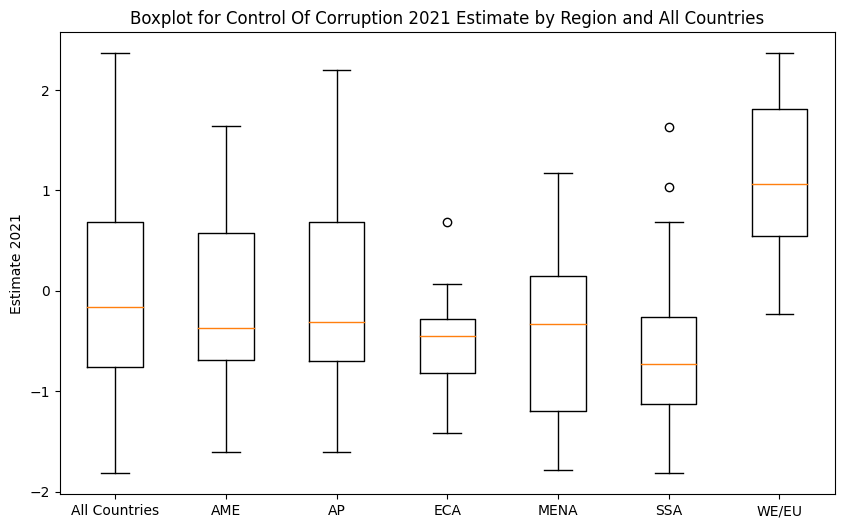

In [16]:
# Список подписей для оси X, первое значение - 'All Countries' для всех стран
labels = [
    'All Countries'
]
# Список данных для boxplot, первое значение - данные для всех стран
boxplot_data = [
    wgidataset['Estimate 2021'].dropna().values
]
# Группировка wgidsataset по регионам и итерация по группам
for region, group in wgidataset.groupby('Region'):
    # Добавление данных в список boxplot_data
    boxplot_data.append(group['Estimate 2021'].dropna().values)
    # Добавление названия региона в список labels
    labels.append(region)

fig, ax = plt.subplots(figsize=(10, 6))
# Отображение boxplot
ax.boxplot(boxplot_data, labels=labels)

ax.set_title('Boxplot for Control Of Corruption 2021 Estimate by Region and All Countries')
ax.set_ylabel('Estimate 2021')

## Задание 2. Анализ рынка акций (4 балла)

### 1. Загрузка данных в один dataframe из всех файлов в директории /data/stock. Все файлы имеют одинаковую структуру, в том числе наименование столбцов. В качестве значений индекса dataframe'а указаны значения столбца "Date". Название столбцов соответствуют названию акций (имя файла без .csv), а их значения - значениям цены закрытия (столбец "Close" в файлах .csv)
_⚠️Замечание. Нужна только цена закрытия_

In [17]:
# Я использую библиотеку pathlib для работы с путями к файлам (моя любимая библиотека)
from pathlib import Path
stock_dir = Path('data/stock')
# Создание датафрейма из файлов в папке stock_dir
# .glob('*.csv') - получение списка файлов с расширением .csv в папке stock_dir
# pd.read_csv(file, usecols, index_col, parse_dates) - чтение файла csv
# usecols=['Date', 'Close'] - использовать только столбцы 'Date' и 'Close'
# index_col='Date' - использовать столбец 'Date' как индекс
# parse_dates=True - парсить даты
# rename(columns={'Close': file.stem}) - переименовать столбец 'Close' в название файла без расширения
# axis=1 - объединить датафреймы по столбцам
stock_df = pd.concat(
    [
        pd.read_csv(filepath, usecols=['Date', 'Close'], index_col='Date', parse_dates=True).rename(columns={'Close': filepath.stem})
        for filepath
        in stock_dir.glob('*.csv')
    ],
    axis=1
)
stock_df


,ADBE,ADSK,AKAM,BABA,BIDU,CA,CHKP,CRM,CTSH,EBAY,...,INTU,MSFT,NTES,NVDA,PYPL,RHT,SAP,TWTR,VMW,YHOO
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-02,73.940002,58.639999,71.050003,83.239998,NaN,32.610001,81.970001,66.809998,62.389999,57.680000,...,96.959999,40.660000,105.300003,20.930000,NaN,75.750000,72.169998,50.080002,82.010002,44.439999
2015-04-01,76.059998,56.830002,73.779999,81.290001,NaN,31.770000,83.480003,72.820000,58.540001,58.259998,...,100.330002,48.639999,128.190002,22.200001,NaN,75.260002,75.690002,38.959999,88.099998,42.570000
2015-05-01,79.089996,54.150002,76.269997,89.320000,NaN,30.450001,84.720001,72.750000,64.720001,61.359997,...,104.150002,46.860001,141.410004,22.129999,NaN,77.269997,73.900002,36.669998,87.320000,42.939999
2015-06-01,81.010002,50.080002,69.820000,82.269997,NaN,29.290001,79.550003,69.629997,61.090000,60.239998,...,100.769997,44.150002,144.869995,20.110001,NaN,75.930000,70.230003,36.220001,85.739998,39.290001
2015-07-01,81.989998,50.580002,76.709999,78.339996,NaN,29.139999,80.769997,73.300003,63.099998,28.120001,...,105.769997,46.700001,138.630005,19.950001,NaN,79.080002,71.669998,31.010000,89.129997,36.669998
2015-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,38.700001,NaN,NaN,NaN,NaN,NaN
2015-08-03,78.570000,46.750000,71.309998,66.120003,NaN,27.290001,78.010002,69.360001,62.939999,27.110001,...,85.750000,43.520000,111.180000,22.480000,35.000000,72.209999,67.260002,27.790001,79.150002,32.240002
2015-09-01,82.220001,44.139999,69.059998,58.970001,NaN,27.299999,79.330002,69.430000,62.610001,24.440001,...,88.750000,44.259998,120.120003,24.650000,31.040001,71.879997,64.790001,26.940001,78.790001,28.910000
2015-10-01,88.660004,55.189999,60.820000,83.830002,NaN,27.709999,84.940002,77.709999,68.110001,27.900000,...,97.430000,52.639999,144.529999,28.370001,36.009998,79.110001,78.709999,28.459999,60.150002,35.619999


### 2. Расчет корреляционной матрицы для всех акций

In [18]:
# .corr() - вычисление корреляции для каждой пары столбцов датафрейма (по умолчанию используется коэффициент Пирсона)
corr_matrix = stock_df.corr()

# Сортировка датафрейма по сумме значений в строках (просто для красоты (субъективно))
corr_matrix = corr_matrix.reindex(corr_matrix.sum().sort_values(ascending=False).index, axis=0).reindex(corr_matrix.sum().sort_values(ascending=False).index, axis=1)

corr_matrix

,BABA,ADSK,PYPL,INTU,YHOO,NTES,SAP,ADBE,NVDA,MSFT,...,RHT,GOOGL,CRM,VMW,EBAY,AKAM,BIDU,INFY,TWTR,CTSH
BABA,1.000000,0.873751,0.783197,0.800199,0.845418,0.806564,0.805775,0.714708,0.699008,0.661599,...,0.556812,0.452358,0.387174,0.411332,0.198884,0.087536,0.056031,-0.168569,-0.139319,-0.589198
ADSK,0.873751,1.000000,0.798648,0.832712,0.690366,0.880215,0.874067,0.853387,0.892613,0.829889,...,0.422972,0.655533,0.387552,0.317948,-0.053116,-0.018722,0.016605,-0.322194,-0.374832,-0.617152
PYPL,0.783197,0.798648,1.000000,0.750377,0.797737,0.752939,0.819823,0.815057,0.708027,0.753978,...,0.260888,0.756846,0.148632,0.289105,0.451863,0.015839,0.389159,-0.566059,-0.609176,-0.666766
INTU,0.800199,0.832712,0.750377,1.000000,0.712311,0.860492,0.806879,0.805904,0.833649,0.762128,...,0.306462,0.552273,0.492148,0.323059,-0.029323,-0.034693,-0.461108,-0.324549,-0.439487,-0.546619
YHOO,0.845418,0.690366,0.797737,0.712311,1.000000,0.528069,0.542135,0.394537,0.501245,0.318707,...,0.397975,0.030759,0.231736,0.619268,0.543315,0.337245,0.017444,0.248663,0.189875,-0.445205
NTES,0.806564,0.880215,0.752939,0.860492,0.528069,1.000000,0.886792,0.945812,0.888984,0.884819,...,0.379601,0.766282,0.484870,0.218694,-0.226171,-0.169440,-0.228890,-0.547505,-0.575405,-0.665497
SAP,0.805775,0.874067,0.819823,0.806879,0.542135,0.886792,1.000000,0.903788,0.823598,0.919401,...,0.301397,0.814216,0.484253,0.031364,-0.217757,-0.365017,-0.055597,-0.426234,-0.579325,-0.625570
ADBE,0.714708,0.853387,0.815057,0.805904,0.394537,0.945812,0.903788,1.000000,0.887010,0.918658,...,0.295120,0.882737,0.534918,0.007322,-0.438998,-0.351316,0.032627,-0.644775,-0.744648,-0.639420
NVDA,0.699008,0.892613,0.708027,0.833649,0.501245,0.888984,0.823598,0.887010,1.000000,0.873954,...,0.136339,0.718214,0.286524,0.271619,-0.249428,-0.054151,-0.335238,-0.509313,-0.571686,-0.667971
MSFT,0.661599,0.829889,0.753978,0.762128,0.318707,0.884819,0.919401,0.918658,0.873954,1.000000,...,0.228355,0.890728,0.453572,-0.048717,-0.406572,-0.341101,-0.318064,-0.596066,-0.721817,-0.555838


### 3. Отображение корреляционной матрицы в виде диаграммы.

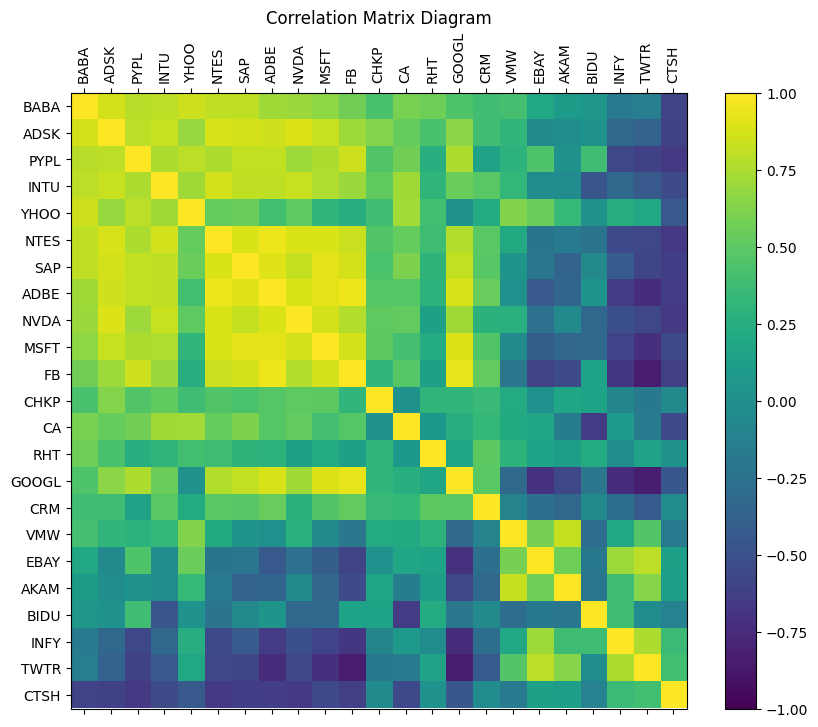

In [19]:
# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(10, 8))
# Установка названия графика
ax.set_title('Correlation Matrix Diagram')
# matshow - отображение матрицы в виде изображения (в данном случае матрица корреляции)
# vmin и vmax - установка минимального и максимального значения (для цветовой шкалы в том числе)
# cax - объект для последующего отображения цветовой шкалы
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
# Отображение цветовой шкалы
fig.colorbar(cax)
# Установка значений для осей x и y
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.index)))
# Установка подписей для осей x и y
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.index)
plt.show()


### 4. В соответствии с моим вариантом (Вариант 1 - Microsoft (MSFT)) определите:
* акцию с максимальной положительной корреляцией (max)
* акцию с максимальной отрицательной корреляцией (min)
* акцию с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none))

In [20]:
# Целевая компания
target_company = 'MSFT'
# Получение отсортированного списка корреляций с целевой компанией, без учета самой целевой компании
corr_with_msft = corr_matrix[target_company].sort_values(ascending=False)[1:]
# Максимальная корреляция
max_corr_company = corr_with_msft.index[1]
# Максимальная отрицательная корреляция
min_corr_company = corr_with_msft.index[-1]
# Компания с корелляцией близкой к нулю
no_corr_company = corr_with_msft[corr_with_msft.abs() == corr_with_msft.abs().min()].index[0]

print(f'Компания с максимальной корреляцией с Microsoft               : {max_corr_company:4} ({corr_with_msft[max_corr_company]:.2f})')
print(f'Компания с максимальной отрицательной корреляцией с Microsoft : {min_corr_company:4} ({corr_with_msft[min_corr_company]:.2f})')
print(f'Компания, корелляция которой с Microsoft близка к нулю        : {no_corr_company:4} ({corr_with_msft[no_corr_company]:.2f})')


Компания с максимальной корреляцией с Microsoft               : ADBE (0.92)
Компания с максимальной отрицательной корреляцией с Microsoft : TWTR (-0.72)
Компания, корелляция которой с Microsoft близка к нулю        : VMW  (-0.05)


### 5. Постройте диаграммы разброса (Ваша компания - Компания с min), (Ваша компания - Компания с max), (Ваша компания - Компания с none)

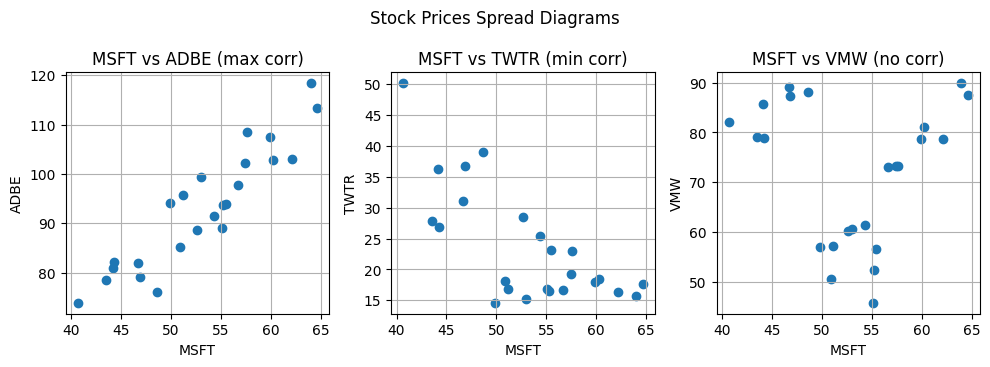

In [21]:
# Компании для построения графиков разброса
companies = [target_company, max_corr_company, min_corr_company, no_corr_company]
# Подписи для графиков
labels = ['MSFT (target)', 'ADBE (max corr)', 'TWTR (min corr)', 'VMW (no corr)']

# Три графика в одной строке
fig, ax = plt.subplots(1, 3, figsize=(10, 3.7))
# Установка названия графика
fig.suptitle('Stock Prices Spread Diagrams')
# Перебор требуемых компаний
for i, company in enumerate(companies[1:]):
    # Отображение точечного графика
    ax[i].scatter(stock_df[target_company], stock_df[company], label=f'{target_company} vs {company}')
    # Отображение легенды
    ax[i].set_title(f'{target_company} vs {labels[i+1]}')
    # Установка подписи оси x
    ax[i].set_xlabel(target_company)
    # Установка подписи оси y
    ax[i].set_ylabel(company)
    # Отображение сетки
    ax[i].grid(visible=True)
# Автоматическое выравнивание графиков
fig.tight_layout()

### 6. Рассчитайте среднюю цену акций для каждого месяца (исходные данные взяты с интервалом в месяц)

In [22]:
# Вычисление средней цены акций для каждого месяца
# resample('MS') - ресемплирование по месяцам (MS - Month Start)
#   Ресемплирование нужно из-за того, что в исходных данных цена различных компаний указана в разное время
#   Хотя даты близкие, но не совпадают, из-за чего невозможно правильно вычислить среднюю цену акций
# first() - выбор первого значения в каждом месяце
# mean(axis=1) - вычисление среднего значения по строкам
average_stock_price = stock_df.resample('MS').first().mean(axis=1)
average_stock_price


Date
2015-03-01     88.030001
2015-04-01     89.109049
2015-05-01     90.564762
2015-06-01     87.711903
2015-07-01     90.353636
2015-08-01     84.474546
2015-09-01     83.863182
2015-10-01     94.246365
2015-11-01     97.221363
2015-12-01     97.331364
2016-01-01     91.659999
2016-02-01     88.829090
2016-03-01     99.561306
2016-04-01     96.432609
2016-05-01    101.787825
2016-06-01     98.156523
2016-07-01    105.233915
2016-08-01    107.825217
2016-09-01    111.394783
2016-10-01    112.875653
2016-11-01    109.284782
2016-12-01    109.423044
2017-01-01    117.401739
2017-02-01    122.210869
Freq: MS, dtype: float64

### 7. Постройте графики для акций из пункта 4 и средней из пункта 6.

Text(0, 0.5, 'Stock Price ($)')

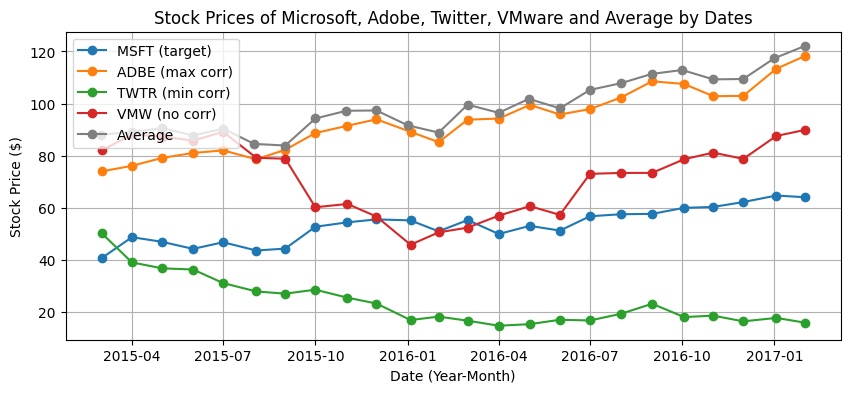

In [23]:
# Создание объекта Figure и Axes
fig, ax = plt.subplots(figsize=(10, 4))
# Установка названия графика
ax.set_title('Stock Prices of Microsoft, Adobe, Twitter, VMware and Average by Dates')
# Перебор компаний и подписей для легенды
for company, label in zip(companies, labels):
    # Отображение линейного графика с маркерами
    # dropna() - удаление пропущенных значений (NaN)
    ax.plot(stock_df[company].dropna(), label=label, marker='o', linestyle='-')
# Отображение линейного графика средней цены акций серым цветом
ax.plot(average_stock_price, label='Average', marker='o', linestyle='-', color='gray')
# Отображение легенды слева сверху внутри графика
ax.legend(loc='upper left')
# Отображение сетки
ax.grid(visible=True)
# Подписи к осям
ax.set_xlabel('Date (Year-Month)')
ax.set_ylabel('Stock Price ($)')
